In [1]:
library(xlsx) # library to import excel spreadsheets as data to analyze

Warning message:
“package ‘xlsx’ was built under R version 3.6.3”

In [7]:
# Importing the dataset
df.data <- read.xlsx("ANOVA Practice Data File.xlsx", sheetName = 1)

In [10]:
# Checking whether the data frame imported correctly
df.data

ID Experience.Level     Blurriness.Level    Throughput
1   1 No Experience        Not Blurred         1.314     
2   2 No Experience        Not Blurred         1.219     
3   3 Moderate Experience  Not Blurred         4.413     
4   4 Moderate Experience  Not Blurred         4.612     
5   5 Extensive Experience Not Blurred         4.752     
6   6 Extensive Experience Not Blurred         4.432     
7   7 No Experience        Moderately Blurred  1.114     
8   8 No Experience        Moderately Blurred  1.119     
9   9 Moderate Experience  Moderately Blurred  2.113     
10 10 Moderate Experience  Moderately Blurred  2.235     
11 11 Extensive Experience Moderately Blurred  4.443     
12 12 Extensive Experience Moderately Blurred  4.512     
13 13 No Experience        Extensively Blurred 0.295     
14 14 No Experience        Extensively Blurred 0.113     
15 15 Moderate Experience  Extensively Blurred 0.443     
16 16 Moderate Experience  Extensively Blurred 0.452     
17 17 Extensive Experience Extensively Blurred 2.113     
18 18 Extensive Experience Extensively Blurred 2.211

In [6]:
# Checking the import results.'data.frame':	18 obs. of  4 variables:
str(df.data)

'data.frame':	18 obs. of  4 variables:
 $ ID              : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Experience.Level: Factor w/ 3 levels "Extensive Experience",..: 3 3 2 2 1 1 3 3 2 2 ...
 $ Blurriness.Level: Factor w/ 3 levels "Extensively Blurred",..: 3 3 3 3 3 3 2 2 2 2 ...
 $ Throughput      : Factor w/ 17 levels "0.113","0.295",..: 8 7 12 16 17 13 5 6 9 11 ...


In [9]:
# Throughput was recorded as a factor variable; In reality, it should be a numeric variable.
# Hence, its data type needs to be changed to reflect this fact.
df.data$Throughput <- as.numeric(as.character (df.data$Throughput))

In [11]:
# Import the ggplot2 library to create graphs
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.6.3”

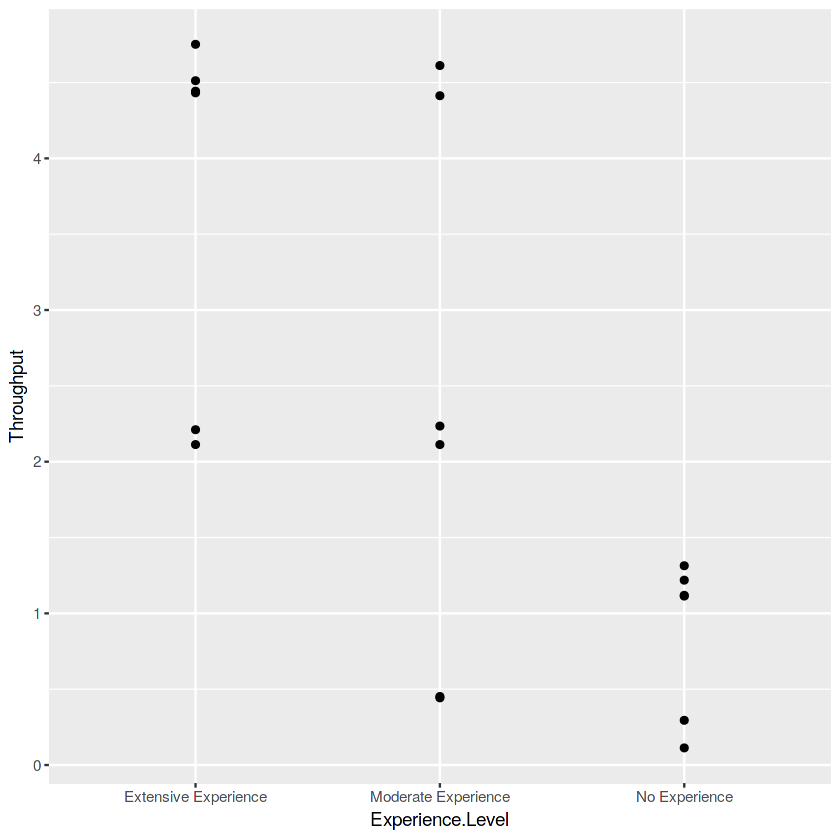

In [12]:
# Plot the difference of means between experience levels
ggplot(df.data, aes(x = Experience.Level, y = Throughput)) + geom_point()

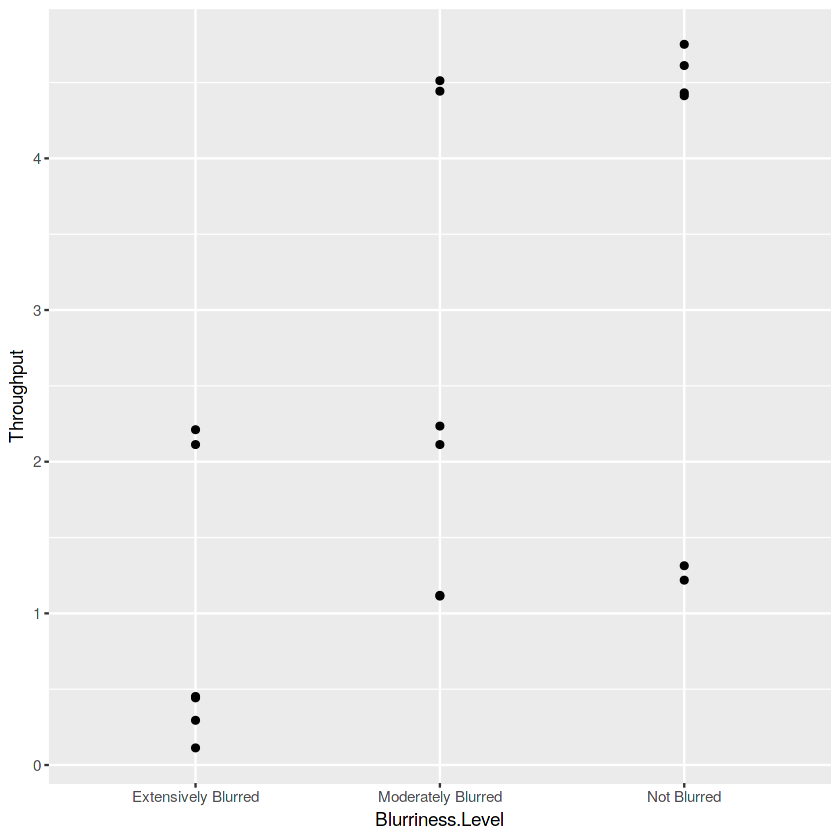

In [13]:
# Plot the difference of means between experience levels
ggplot(df.data, aes(x = Blurriness.Level, y = Throughput)) + geom_point()

In [16]:
# First ANOVA, testing all factors and all interaction effects
# There are three hypotheses we wish to test.
# 1. Does experience affect one's annotation throughput?
# 2. Does blurriness of the image being annotated affect one's annotation throughput?
# 3. Does one's experience mitigate the effect of blurriness (i.e. are skilled annotators less slowed down by blurriness?)
result <- aov(Throughput ~ Experience.Level + Blurriness.Level + Experience.Level*Blurriness.Level, data = df.data)

In [18]:
result2 <- aov(Throughput ~ Experience.Level + Blurriness.Level + Experience.Level*Blurriness.Level, data = df.data)

In [15]:
# Check the results. What do you see?
summary(result) 

                                  Df Sum Sq Mean Sq F value   Pr(>F)    
Experience.Level                   2 24.932  12.466  1051.0 2.16e-11 ***
Blurriness.Level                   2 19.653   9.826   828.4 6.26e-11 ***
Experience.Level:Blurriness.Level  4  5.838   1.460   123.1 7.55e-08 ***
Residuals                          9  0.107   0.012                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [19]:
# Check the results for the new ANOVA. What do you see?
summary(result2)

                                  Df Sum Sq Mean Sq F value   Pr(>F)    
Experience.Level                   2 24.932  12.466  1051.0 2.16e-11 ***
Blurriness.Level                   2 19.653   9.826   828.4 6.26e-11 ***
Experience.Level:Blurriness.Level  4  5.838   1.460   123.1 7.55e-08 ***
Residuals                          9  0.107   0.012                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [20]:
# Remember that ANOVA by itself doesn't give information about which classes have higher or lower means
# To gain that information, an additional test (Tukey's )
TukeyHSD(result2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Throughput ~ Experience.Level + Blurriness.Level + Experience.Level * Blurriness.Level, data = df.data)

$Experience.Level
                                              diff       lwr       upr p adj
Moderate Experience-Extensive Experience -1.365833 -1.541392 -1.190274     0
No Experience-Extensive Experience       -2.881500 -3.057059 -2.705941     0
No Experience-Moderate Experience        -1.515667 -1.691226 -1.340108     0

$Blurriness.Level
                                            diff       lwr      upr p adj
Moderately Blurred-Extensively Blurred 1.6515000 1.4759409 1.827059 0e+00
Not Blurred-Extensively Blurred        2.5191667 2.3436075 2.694726 0e+00
Not Blurred-Moderately Blurred         0.8676667 0.6921075 1.043226 6e-07

$`Experience.Level:Blurriness.Level`
                                                                                    diff
Moderate Experience:Extensively 

In [21]:
# Extracting residuals from the ANOVA results
df.data$residuals2 <- result2$residuals

In [22]:
# Performing a normality test on the residuals
shapiro.test(df.data$residuals2)


	Shapiro-Wilk normality test

data:  df.data$residuals2
W = 0.99231, p-value = 0.9998


In [24]:
# Performing a homoscedasticity test on the residuals for blurriness level
library(car)
leveneTest(residuals2 ~ Experience.Level, data = df.data)

Warning message:
“package ‘car’ was built under R version 3.6.3”

Loading required package: carData


Df F value   Pr(>F)   
group  2 0.8023609 0.4666029
      15        NA        NA

In [25]:
#Performing a homoscedasticity test on the residuals for blurriness level
leveneTest(residuals2 ~ Blurriness.Level, data = df.data)

Df F value  Pr(>F)    
group  2 5.103015 0.02038925
      15       NA         NA